In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.kernel_ridge import KernelRidge

### Midterm 1 Project, Problem 2-4

Optimized Kernel: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Original Length Scale (ℓ): 1.8431891941054277
New Length Scale (ℓ * 2): 3.6863783882108554


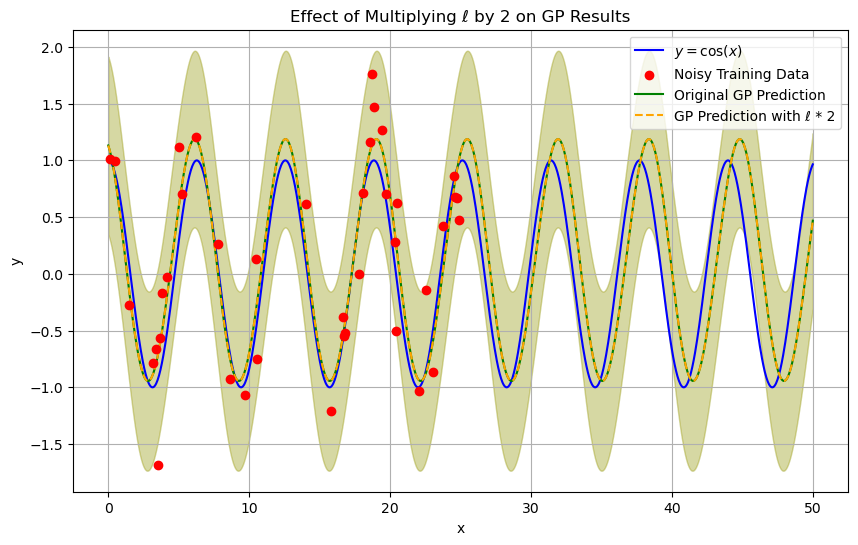

In [2]:
# Part 1: Generate noisy data as done previously
x = np.linspace(0, 50, 1000)  # Generate 1000 evenly spaced x data points
y_true = np.cos(x)  # True function y = cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)  # Select 40 x points from the first 500
y_train_noisy = y_true[indices] + noise  # Add noise to the corresponding y points

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters
kernel_optimized = gp.kernel_
print("Optimized Kernel:", kernel_optimized)

# Extract the optimized length scale (ℓ)
ell = kernel_optimized.k1.length_scale
print(f"Original Length Scale (ℓ): {ell}")

# Multiply the length scale by 2
new_ell = 2 * ell
print(f"New Length Scale (ℓ * 2): {new_ell}")

# Update the kernel with the new length scale (ℓ * 2)
new_kernel = ExpSineSquared(length_scale=new_ell,
                            periodicity=kernel_optimized.k1.periodicity) + WhiteKernel(noise_level=kernel_optimized.k2.noise_level)

# Re-fit the GP with the modified kernel
gp_new = GaussianProcessRegressor(kernel=new_kernel, n_restarts_optimizer=10)
gp_new.fit(x_train, y_train_noisy)

# Predict using the GP with modified length scale
y_pred_new, y_std_new = gp_new.predict(x_pred, return_std=True)

# Plot the results with the original GP and new GP after multiplying ℓ by 2
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the original GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred, label="Original GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2, color='green')

# Plot the new GP predictions with increased length scale
plt.plot(x_pred, y_pred_new, label="GP Prediction with ℓ * 2", color='orange', linestyle='--')
plt.fill_between(x_pred.flatten(), y_pred_new - 1.96 * y_std_new, y_pred_new + 1.96 * y_std_new, alpha=0.2, color='orange')

# Set labels, title, and legend
plt.title("Effect of Multiplying ℓ by 2 on GP Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Increasing ℓ makes the model less sensitive to variations in the input variable, leading to a smoother prediction curve. This also causes the uncertainty range to widen, as the model assumes that changes in the input have less influence on the output over larger distances. Since the data has a strong periodic signal (cos(x)), increasing ℓ doesn’t significantly alter the mean prediction. This is why the two curves (green and orange) appear similar over most of the range.